In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF

In [2]:
plt.rcParams['font.size'] = 14

In [3]:
import py_block_diagram

In [4]:
import importlib

In [5]:
importlib.reload(py_block_diagram)

<module 'py_block_diagram' from '/home/ryanwkrauss/git/py_block_diagram/py_block_diagram/__init__.py'>

In [6]:
import py_block_diagram as pybd

## Test Case 1: Simple Feedback Loop

- the feedback loop is called out explicitly

In [7]:
U = pybd.step_input("$U(s)$")

In [8]:
sum1 = pybd.summing_junction(U,radius=0.35)

In [9]:
str(type(U).__name__)

'step_input'

In [10]:
type(U).__module__

'py_block_diagram'

In [11]:
U.place_absolute(0,0)

In [12]:
sum1.place_relative(U,"right")

In [13]:
D = pybd.PD_controller(3, 0.1, sum1, "$D(s)$")

In [14]:
D.input_block

In [15]:
D.place_relative(sum1, "right",3.5)

In [16]:
G = pybd.TF_block("$G(s)$",D)

In [17]:
G.input_block is None

False

In [18]:
G.place_relative(D,"right",5)

In [19]:
Y = pybd.output_block("$Y(s)$",G)
Y.place_relative(G, "right",6)

In [20]:
sum1.input2 = G

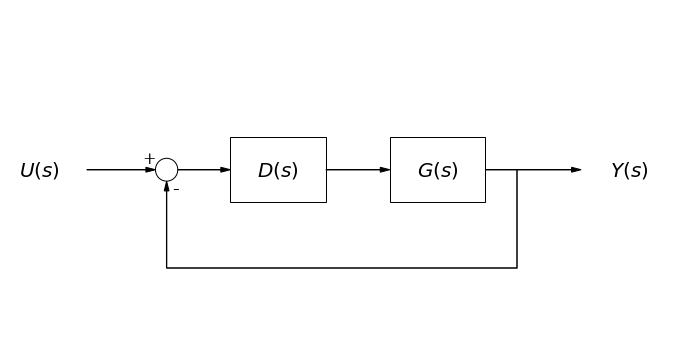

In [21]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
mysys = pybd.block_diagram([U,sum1,D,G,Y],ax)
mysys.draw()
plt.xlim([-1,20])
plt.ylim([-5,5])
mysys.axis_off()

## Codegen Test on Parital System



In [22]:
test_sys = pybd.block_diagram([U,sum1,D])

In [23]:
test_sys.generate_python_code("py_autogen_1.py",template_path="pylooptemplate.py")

In [24]:
test_sys.python_file.list

['#import smbus',
 'import pigpio',
 'import time',
 'import numpy as np',
 'import copy',
 'import matplotlib.pyplot as plt',
 "plt.close('all')",
 'import py_block_diagram',
 'import serial_utils',
 '',
 '',
 'def mysat(vin):',
 '    if vin > 255:',
 '        return 255',
 '    elif vin < -255:',
 '        return -255',
 '    else:',
 '        return vin',
 '',
 '',
 '',
 'pi = pigpio.pi()',
 'if not pi.connected:',
 '    print("not connected")',
 '    exit()',
 '',
 '',
 '# leave this as manual for now',
 'TIMING_ADDRESS = 0x05',
 'MOTOR_ADDRESS = 0x04',
 '',
 '',
 't_ino = pi.i2c_open(1, TIMING_ADDRESS)',
 'm_ino = pi.i2c_open(1, MOTOR_ADDRESS)',
 '',
 'h_spi = pi.spi_open(0, 400000)',
 '',
 '#c, d = pi.i2c_read_device(h,8)',
 '',
 '',
 '',
 '',
 '# In[168]:',
 '',
 '# sysprecode',
 'N = 1000',
 '',
 '',
 'N = 500',
 '',
 't0 = time.time()',
 'check_array = np.zeros(1000)',
 'j = 0',
 'n = 0',
 '',
 '# blockinitcode',
 'u = py_block_diagram.step_input(label="$U(s)$", on_time=0.1, a

## Next steps:

- I need i2c and spi communication blocks
- I need to specify execution order of the blocks for the loop code
    - I think this is done, but not tested